In [52]:
# importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.auto_encoder import AutoEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv("../data/TimeSeries.csv")
labels = pd.read_csv('../data/labelsTimeSeries.csv')

**AutoEncoders**

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(df.values)

In [4]:
pca = PCA(n_components=2)
X_train_scaled = pca.fit_transform(X_train)

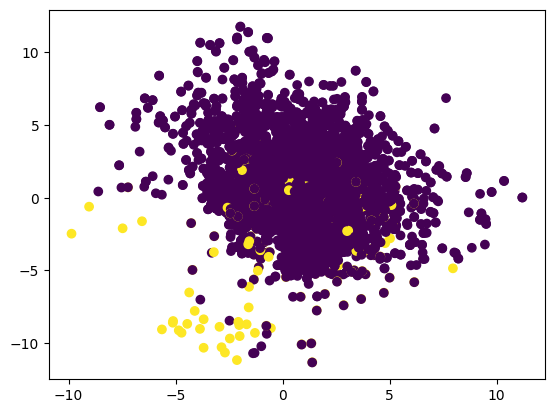

In [5]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=labels.values)

In [72]:
clf = AutoEncoder(hidden_neurons=[2, 25, 25, 25, 2], contamination=0.01, epochs=5)
clf.fit(X_train_scaled)

/home/ubuntu/miniconda3/envs/anomaly/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,451 (5.67 KB)

 Trainable params: 1,451 (5.67 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
14334/14334 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 1.9093 - val_loss: 0.9979
Epoch 2/5
14334/14334 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.9990 - val_loss: 0.9975
Epoch 3/5
14334/14334 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 1.0028 - val_loss: 0.9974
Epoch 4/5
14334/14334 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 1.0011 - val_loss: 0.9974
Epoch 5/5
14334/14334 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 1.0001 - val_loss: 0.9974
15926/15926 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step


AutoEncoder(batch_size=32, contamination=0.01, dropout_rate=0.2, epochs=5,
      hidden_activation='relu', hidden_neurons=[2, 25, 25, 25, 2],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7f11a495c040>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [73]:
test_scores = clf.decision_function(X_train_scaled)

15926/15926 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step


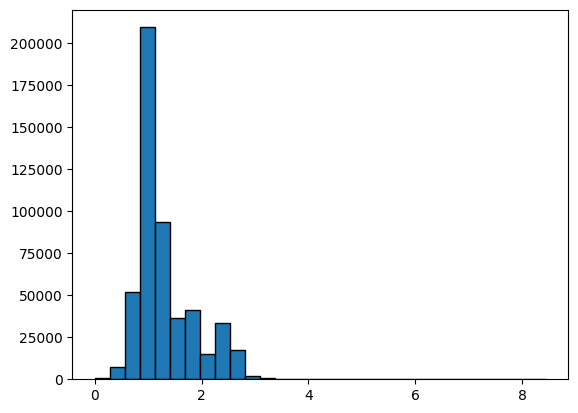

In [74]:
plt.hist(test_scores, bins=30, ec='k')
plt.show()

In [75]:
labels['anomaly'] = np.where(test_scores > 3, 1, 0)

In [76]:
(labels['label'].eq(labels['anomaly'])).mean()

0.9955830874042446

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report

In [78]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm / len(y_pred)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'anomally'])
    # disp.plot()
    sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues', xticklabels=['normal', 'anomally'], yticklabels=['normal', 'anomally'])
    plt.show()

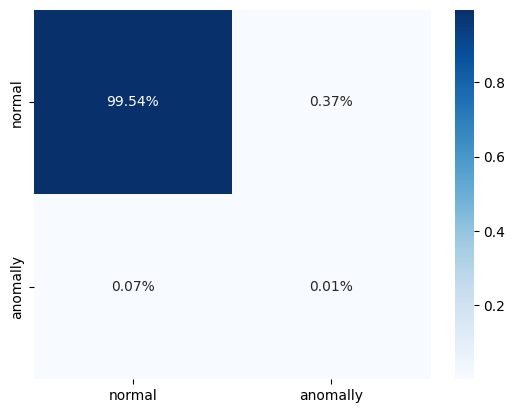

In [79]:
plot_confusion_matrix(labels['label'], labels['anomaly'])

In [80]:
print(classification_report(labels['label'], labels['anomaly']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    509189
           1       0.04      0.17      0.06       443

    accuracy                           1.00    509632
   macro avg       0.52      0.58      0.53    509632
weighted avg       1.00      1.00      1.00    509632



**LOF**

In [81]:
from sklearn.neighbors import LocalOutlierFactor

In [111]:
lof = LocalOutlierFactor(contamination=0.01)
y_pred = lof.fit_predict(X_train_scaled)

In [112]:
y_pred = np.where(y_pred == -1, 1, 0)

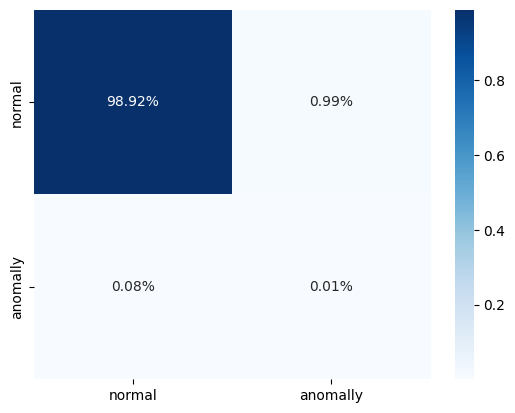

In [113]:
plot_confusion_matrix(labels['label'], y_pred)

In [114]:
print(classification_report(labels['label'], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    509189
           1       0.01      0.07      0.01       443

    accuracy                           0.99    509632
   macro avg       0.50      0.53      0.50    509632
weighted avg       1.00      0.99      0.99    509632



In [115]:
f1_score(labels['label'], y_pred, average='weighted')

0.9937377555616069

**Isolation Forest**

In [102]:
from sklearn.ensemble import IsolationForest

In [169]:
iso = IsolationForest(contamination=0.01)
y_pred = iso.fit_predict(X_train_scaled)
y_pred = np.where(y_pred == -1, 1, 0)

In [170]:
labels['anomaly'] = y_pred

In [171]:
b = labels[labels['label'] == 1]
b

,label,anomaly
10702,1,0
11424,1,0
11885,1,0
12320,1,0
12703,1,0
...,...,...
508711,1,0
508812,1,0
509050,1,1
509380,1,1


In [172]:
b[b['anomaly'] == 1].shape[0] / 443

0.2979683972911964

In [173]:
labels['anomaly'].value_counts(normalize=True)

anomaly
0    0.99012
1    0.00988
Name: proportion, dtype: float64

**ADTK**

In [191]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled['Date'] = pd.date_range(start='1990-01-01', periods=509632, freq='H')
X_train_scaled.set_index('Date', inplace=True)

/tmp/ipykernel_50732/1613934898.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  X_train_scaled['Date'] = pd.date_range(start='1990-01-01', periods=509632, freq='H')


In [203]:
from adtk.detector import OutlierDetector
from adtk.visualization import plot
outlier_detector = OutlierDetector(IsolationForest(contamination=0.01))
anomalies = outlier_detector.fit_predict(X_train_scaled)

/home/ubuntu/miniconda3/envs/anomaly/lib/python3.10/site-packages/adtk/detector/_detector_hd.py:179: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False False False ... False False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_outliers.loc[df.dropna().index] = (


In [ ]:
plot(X_train_scaled, anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red')

In [204]:
b = np.where(anomalies, 1, 0)

In [205]:
labels['anomaly'] = b

In [206]:
b = labels[labels['label'] == 1]
b

,label,anomaly
10702,1,0
11424,1,0
11885,1,0
12320,1,0
12703,1,0
...,...,...
508711,1,0
508812,1,0
509050,1,1
509380,1,0


In [207]:
b[b['anomaly'] == 1].shape[0] / 443

0.26410835214446954